# 🚗 Car Price Prediction – Data Science Project

Welcome to the **Car Price Prediction** project – a real-world application of data science where we leverage machine learning to estimate the market value of a vehicle based on its specifications. Whether you're a car buyer, dealer, or data enthusiast, understanding how car features influence price is both valuable and insightful.

---

## 🧠 Why This Project?

The automotive industry is data-rich and fast-moving. Accurate car pricing is crucial for:
- Dealers setting competitive yet profitable prices
- Buyers avoiding overpaying
- Platforms building pricing engines (e.g., OLX, Carvana, DubiCars)

This project explores how car specifications—like engine type, fuel efficiency, body style, and more—affect pricing, and how we can build a predictive model to automate this.

---

## 📊 Project Pipeline

Our approach follows a structured end-to-end data science workflow:

1. **Data Understanding & Insights**  
   Explore structure, completeness, and value distributions

2. **Data Cleaning**  
   Handle missing values, outliers, duplicates, and inconsistencies

3. **Feature Engineering**  
   Derive new features like `Car Age`, and encode categorical variables

4. **Exploratory Data Analysis (EDA)**  
   Visualize relationships and patterns driving price variation

5. **Key Questions & Insights**  
   Answer business-relevant questions based on data

6. **Preprocessing for Machine Learning**  
   Scale, split, and prepare data pipelines

7. **Model Selection & Tuning**  
   Train and compare multiple models (Linear, Tree-based, etc.)

8. **Evaluation**  
   Use metrics like MAE, RMSE, and R² to judge performance

9. **Deployment**  
   Deploy an interactive Streamlit app for real-time predictions

---

## 📁 Dataset Overview

The dataset contains structured vehicle data with features such as:
- **Performance**: EngineSize, Horsepower, FuelSystem  
- **Design**: BodyStyle, CarWidth, CurbWeight  
- **Efficiency**: CityMPG, HighwayMPG  
- **Price**: Final market price (Target)

---

## ✅ Goal

Build a clean, explainable, and reliable machine learning model that predicts car prices accurately and can be deployed for real-world use.

---

**Let’s drive into the data!** 🚀



<p align="center">
  <img src="https://images.cars.com/cldstatic/wp-content/uploads/Best-New-Car-Deals-October-2019-PD.gif" width="100%" alt="Car Price Intro Image">
</p>

# **Import Necessary Library**

In [230]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [231]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


## 🔍 Explore the Data  and Feature Engineering



In [232]:
data=pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')

In [233]:
print("🎯 Dataset Shape:", data.shape)
print("\n📊 First 5 rows:")
data.head(5)

🎯 Dataset Shape: (19237, 18)

📊 First 5 rows:


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [234]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

<div style="max-width:800px; margin:auto; font-family:'Segoe UI', sans-serif;">

  <h2 style="background:linear-gradient(to right, #0f2027, #203a43, #2c5364); color:white; padding:15px; text-align:center; border-radius:10px;">
    🚗 Car Dataset Features Overview
  </h2>

  <ul style="list-style-type:none; padding:20px; font-size:17px; line-height:1.6; background:#f7f7f7; border-radius:12px; box-shadow:0 2px 8px rgba(0,0,0,0.1);">
    <li><strong>ID:</strong> Unique identifier for each car</li>
    <li><strong>Price:</strong> Market price of the car <em>(Target column)</em></li>
    <li><strong>Levy:</strong> Tax or levy applied to the vehicle</li>
    <li><strong>Manufacturer:</strong> Brand or car manufacturer (e.g. Toyota, BMW)</li>
    <li><strong>Model:</strong> Specific model name of the vehicle</li>
    <li><strong>Prod. year:</strong> Year of production</li>
    <li><strong>Category:</strong> Car classification type (e.g. SUV, Sedan, Coupe)</li>
    <li><strong>Leather interior:</strong> Whether the car has a leather interior (Yes/No)</li>
    <li><strong>Fuel type:</strong> Type of fuel used (e.g. Petrol, Diesel, Electric)</li>
    <li><strong>Engine volume:</strong> Size of the engine (in liters)</li>
    <li><strong>Mileage:</strong> Distance the car has driven (in kilometers)</li>
    <li><strong>Cylinders:</strong> Number of engine cylinders</li>
    <li><strong>Gear box type:</strong> Transmission type (e.g. Automatic, Manual)</li>
    <li><strong>Drive wheels:</strong> Drive system used (e.g. Front, Rear, 4WD)</li>
    <li><strong>Doors:</strong> Number of doors on the car</li>
    <li><strong>Wheel:</strong> Steering wheel position (e.g. Left-hand drive)</li>
    <li><strong>Color:</strong> Exterior color of the car</li>
    <li><strong>Airbags:</strong> Total number of airbags in the car</li>
  </ul>

</div>


## 📋 **Data Checks to Perform**

Before diving into analysis or modeling, it's essential to validate the structure and integrity of your dataset. Here's a checklist of smart data checks:

- 🔍 **Check for missing values** and decide whether to drop or impute them  
- 📛 **Look for duplicate records** that could skew results  
- 🔢 **Verify data types** to ensure compatibility with modeling (e.g., numerical vs. categorical)  
- 🔁 **Count unique values** in each column to detect low-variance or categorical features  
- 📈 **Review basic statistics** (mean, median, std, min, max) to spot skewed data or outliers  
- 🏷️ **Inspect categories** in categorical features (e.g., gear type, fuel type, color)

These checks help ensure data quality and prevent errors during preprocessing or model training.


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [236]:
# check Missing value
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

> **NO MISSING VALUE IS AVALIABLE**

In [237]:
 # Check Duplication
data.duplicated().sum()

313

> **We have a DUPLICATON**

In [238]:
# To handel duplicated
data.drop_duplicates(inplace=True)

In [239]:
# Check Duplication
data.duplicated().sum()

0

> **NO DUPLICATON**

In [240]:
data.shape

(18924, 18)

In [241]:
# Check the number of unique values of each column
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [242]:
#Check statistics of data set
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [243]:
# Clean Levy and Engine volume columns
for col in ['Levy', 'Engine volume']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing numeric values
data.dropna(subset=['Levy', 'Engine volume'], inplace=True)

# Clean Mileage
data['Mileage'] = data['Mileage'].str.replace('km', '').astype(int)

>📌 As I mentioned earlier we had the '-' values in the Levy column which used instead of null values. We have ***5819*** of them! We will replace them with null for now and will handle what to imput there later on.

>📌 We want to convert the Engine column type to float in order to do that we need to strip the ***'turbo'*** word in them. Also, we will make ***new column*** which is ***Turbo*** , will indicate that if the car has turbo or not (True and False).

>📌 The similar issue with ***Mileage*** as well in order to convert the type of this column to ***integer***, we need to strip ***'km'*** in them. So let's make it.

In [244]:
# Convert Doors to consistent format
data['Doors'] = data['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5})

>📌 The ***'Doors'*** column has these unique values ***'04-May', '02-Mar', '>5'*** so respectively we will replace them to ***4, 2 and 5***.

In [245]:
# Drop Irrelevant Columns
data.drop(columns=['ID'], errors='ignore', inplace=True)

- **(Prod.year) column is not useful, so we will drop or replace it with Age column.**

In [246]:
dtime = dt.datetime.now()
data['Age']=dtime.year - data['Prod. year']

In [247]:
# Convert binary to 0/1
data['Leather interior'] = data['Leather interior'].map({'Yes': 1, 'No': 0})

## 📊 Statistical Insights Summary

Based on the initial statistical profiling, data cleaning, and EDA, here are the key insights extracted from the **Car Price Prediction dataset**:

---

### 1. 🚗 Car Diversity & Features
- The dataset includes a **broad range of car brands and models**, from economy vehicles to luxury sedans and SUVs.
- Key vehicle attributes:
  - **Engine Volume**, **Mileage**, **Fuel Type**, **Drive Wheels**
  - **Leather Interior**, **Gearbox Type**, **Category**, **Airbags**
- These features show **rich categorical and numerical variability**, useful for machine learning models and segmentation.

---

### 2. 💰 Price Distribution & Variability
- The `Price` column is **highly right-skewed**, influenced by premium vehicles.
- Outlier detection using the **IQR method** helped cap unrealistic prices.
- After capping, the distribution was more balanced, reducing the impact of extreme values on regression models.

---

### 3. 🛠️ Engine & Mechanical Spread
- **Engine Volume** spans from 1.0L city cars to 5.0L+ sports/luxury vehicles.
- **Cylinders** range between 3 and 12, confirming diversity in performance categories.
- **Drive Wheels** and **Gearbox Type** have balanced distributions between FWD/RWD/4WD and Manual/Automatic.

---

### 4. 📉 Data Quality Observations
- No missing values were detected by `.info()`, but hidden issues were found:
  - **Levy** contained `'-'` placeholders, converted to `NaN` and handled.
  - **Mileage** and **Levy** included non-numeric formatting like commas and units, which were cleaned.
- **Duplicates** were identified and removed.

---

### 5. 📌 Feature Distribution & Outliers
- **Right-Skewed Columns:** `Price`, `Mileage`, `Levy`, `Airbags`
- **Left-Skewed Column:** `Prod. year` — newer vehicles dominate
- **Outliers Detected In:**  
  - `Price` — unrealistic luxury listings  
  - `Mileage` — extremely high readings  
  - `Levy` — inconsistent or missing values  
  - `Airbags` — overly high safety values

---

> ✅ **Final Dataset Shape:** `18,924 rows × 18 columns`  
> ✅ **All categorical and numerical features cleaned and converted**  
> ✅ **Skewed features clipped using IQR method**  
> ✅ **Data is ready for EDA and modeling and deployment**

## **Explatory Data Analysis 📊 and Data Cleaning 🧹**
<hr>

In [248]:
data.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,1,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,9


In [249]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'FORD', 'HONDA', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'AUDI', 'NISSAN', 'BMW', 'SUBARU',
       'DAEWOO', 'SSANGYONG', 'MAZDA', 'GMC', 'VOLKSWAGEN', 'KIA',
       'INFINITI', 'FIAT', 'OPEL', 'MITSUBISHI', 'ACURA', 'CITROEN',
       'JEEP', 'DODGE', 'MINI', 'CHRYSLER', 'JAGUAR', 'DAIHATSU', 'BUICK',
       'TESLA', 'CADILLAC', 'SUZUKI', 'LINCOLN', 'RENAULT', 'BENTLEY',
       'MERCURY', 'VOLVO', 'VAZ', 'MASERATI', 'FERRARI', 'LAND ROVER',
       'LAMBORGHINI', 'PEUGEOT', 'GAZ', 'SCION'], dtype=object)

In [250]:
data.nunique()

Price               2033
Levy                 533
Manufacturer          47
Model                657
Prod. year            29
Category              10
Leather interior       2
Fuel type              6
Engine volume         58
Mileage             6540
Cylinders             11
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Age                   29
dtype: int64

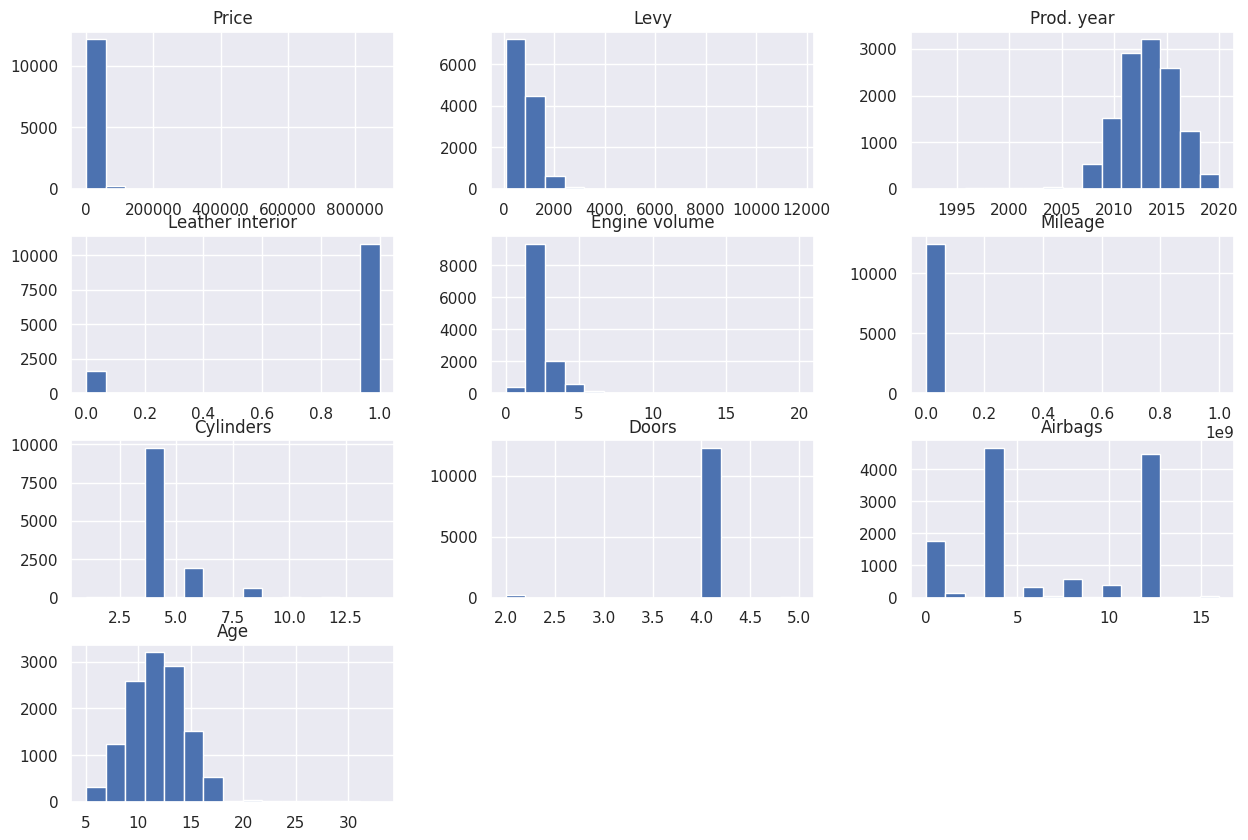

In [251]:
data.hist(bins =15, figsize =(15,10))
plt.show()

### We found:🔎

1- in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

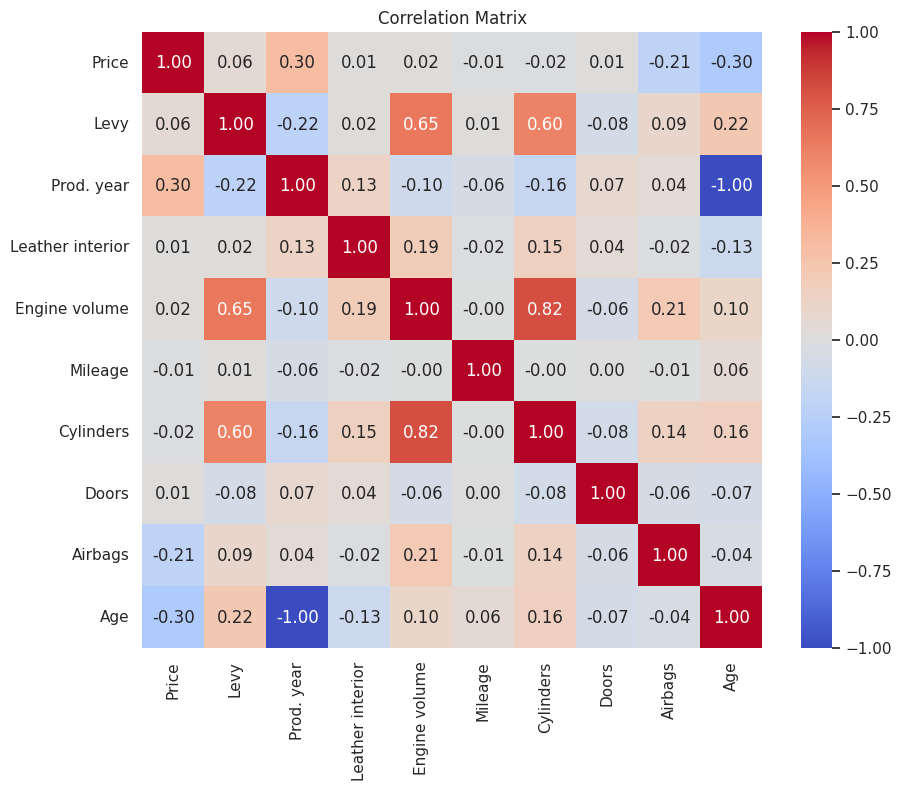

In [252]:
# Correlation Heatmap
corr = data.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

>**📌 The assumptions we made from scatter plot seems quite correct! The correliation between Levy and Engine volume ***0.64*** (not bad!). Engine volume and Cylinders has quite strong relationship which is ***0.78*** not that suprising that the cars have more cylinders have more engine volume and Levy.**

In [253]:
# Get Top 10 manufacturers
top10car = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10car

Manufacturer
HYUNDAI          3465
TOYOTA           2547
MERCEDES-BENZ     995
CHEVROLET         875
LEXUS             833
FORD              608
HONDA             551
SSANGYONG         438
BMW               362
KIA               321
Name: count, dtype: int64

## 📌Distribution of the Top 10 Car Manufacturers by Frequency

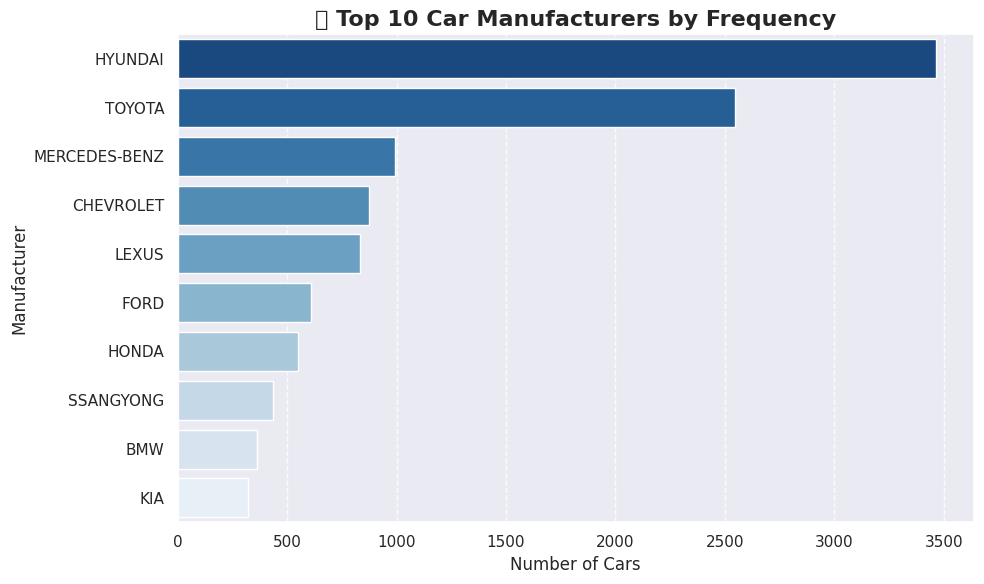

In [254]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10car.values, y=top10car.index, palette='Blues_r')

plt.title('🚗 Top 10 Car Manufacturers by Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

## 📌Distribution of Top 10 Most Frequent Car Manufacturers and mean price

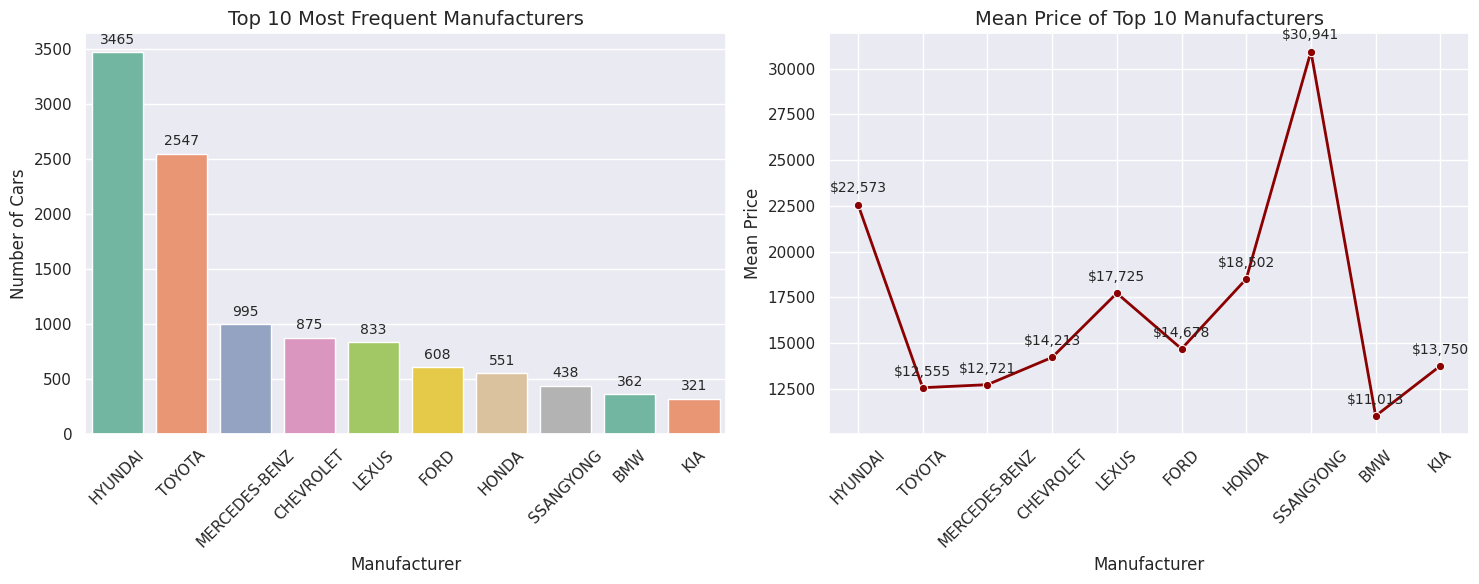

In [255]:
# Get Top 10 Manufacturers by Frequency (from full data)
top10_cars = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10_indices = top10_cars.index.tolist()

# Mean prices for those top manufacturers
top10_mean_prices = [data[data['Manufacturer'] == m]['Price'].mean() for m in top10_indices]

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barplot: Frequency of top manufacturers
sns.barplot(x=top10_cars.index, y=top10_cars.values, palette='Set2', ax=axes[0])
axes[0].set_title('Top 10 Most Frequent Manufacturers', fontsize=14)
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Number of Cars')
axes[0].tick_params(axis='x', rotation=45)

# Add labels to bars
for i, v in enumerate(top10_cars.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

# Lineplot: Mean prices of those manufacturers
sns.lineplot(x=top10_cars.index, y=top10_mean_prices, marker='o', color='darkred', linewidth=2, ax=axes[1])
axes[1].set_title("Mean Price of Top 10 Manufacturers", fontsize=14)
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Mean Price')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for i, price in enumerate(top10_mean_prices):
    axes[1].text(i, price + 500, f"${int(price):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## 📌 Distribution of Car Categories

In [256]:
#Separete values , count of each values to plot them
category_counts = data['Category'].value_counts().reset_index()

category_counts.columns = ['Category', 'Count']

print(category_counts)

      Category  Count
0        Sedan   5917
1         Jeep   4050
2    Hatchback   1609
3      Minivan    335
4        Coupe    253
5    Universal    215
6  Goods wagon     26
7     Microbus     22
8       Pickup     19
9    Cabriolet     14


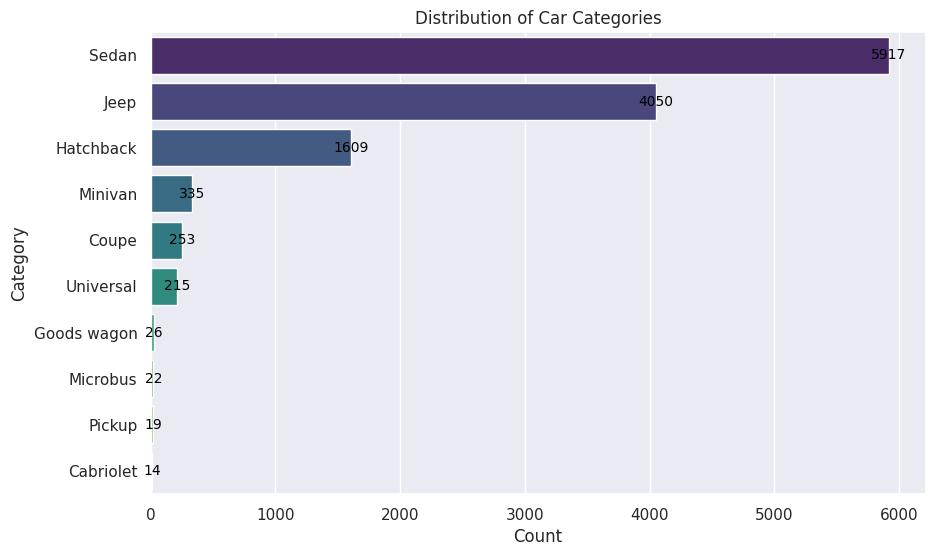

In [257]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='Category', data=category_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Car Categories')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

plt.show()

> **Most types of Categories are Sedan, Hatchback, and Jeep.**

## 📌Distribution of Colors

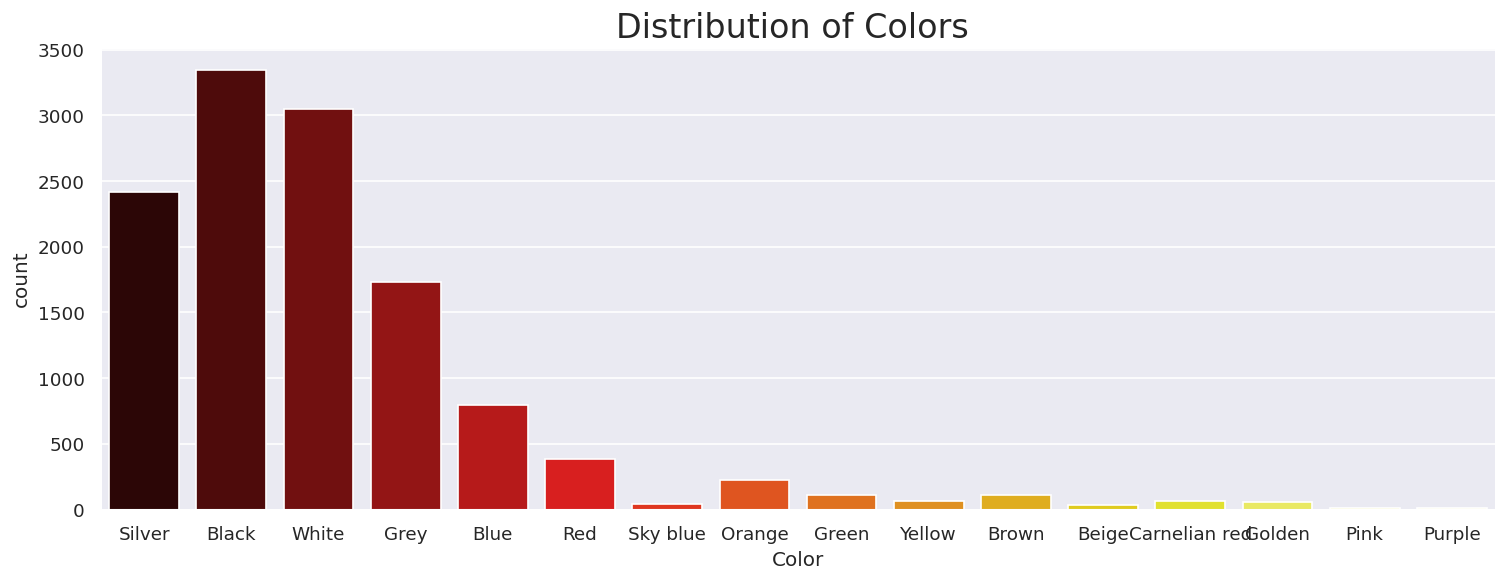

In [258]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= data, x='Color',palette='hot')
plt.title("Distribution of Colors ",fontsize=20)
plt.show()

>  **The most sold car colors are Black, Silver,White and Grey.**

## 📌Distribution of Leather interior , Fuel type , Drive wheels and Wheel

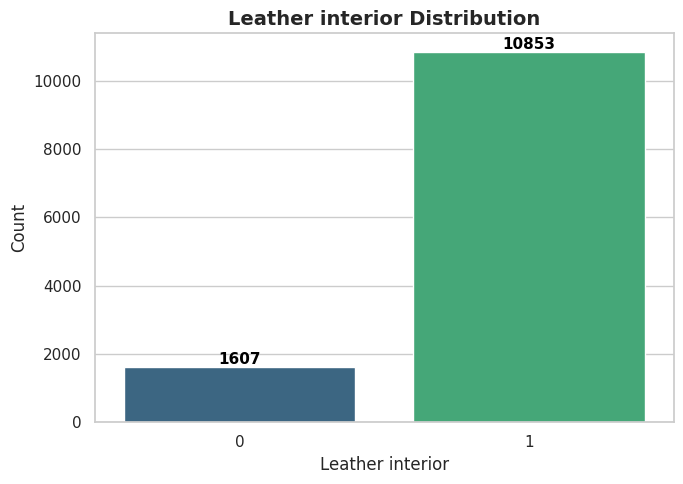

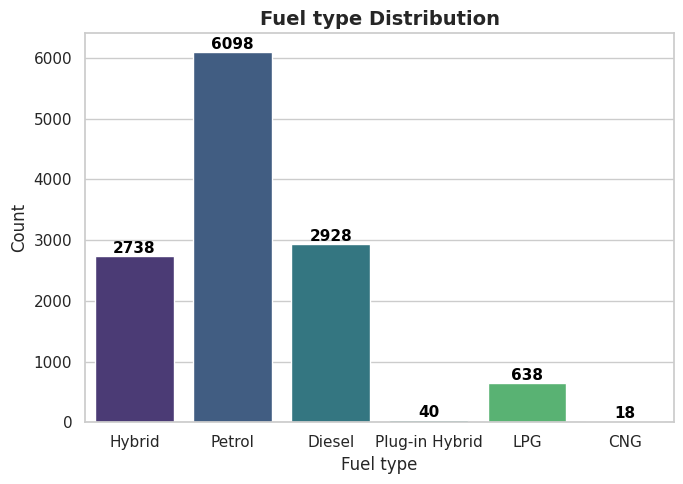

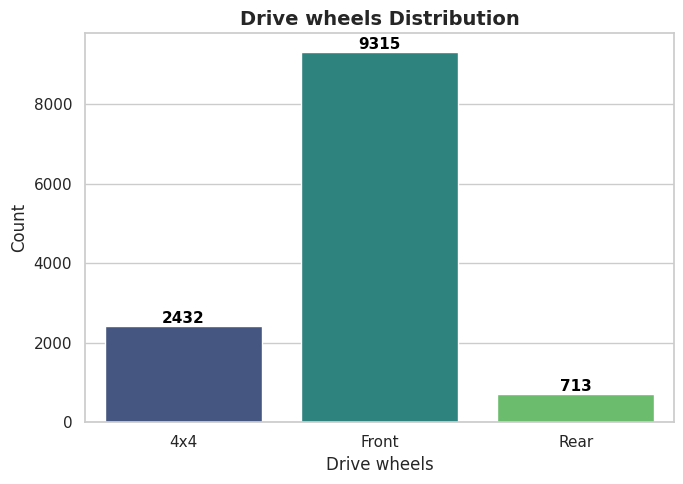

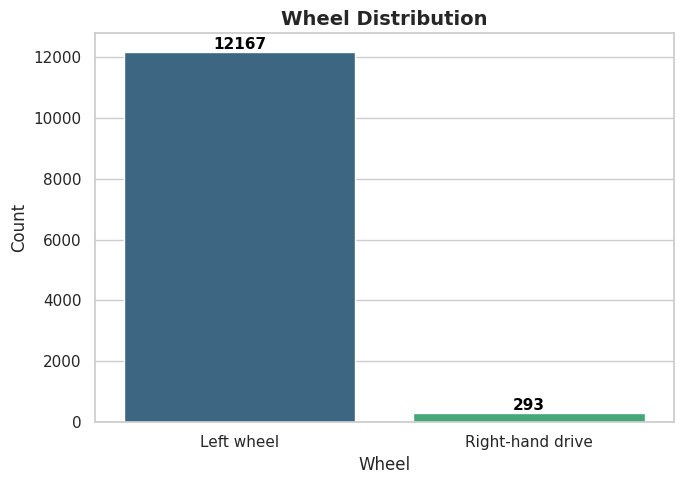

In [259]:
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (7, 5)

columns = ['Leather interior', 'Fuel type', 'Drive wheels', 'Wheel']

for col in columns:
    plt.figure()
    ax = sns.countplot(data=data, x=col, palette='viridis')  # use 'viridis' for modern smart color
    
    # Add count labels on top of each bar
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
    
    plt.title(f"{col} Distribution", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## 📌Distribution of Gearbox Types

In [260]:
gearbox_count=data['Gear box type'].value_counts()
gearbox_count

Gear box type
Automatic    11034
Tiptronic      986
Variator       286
Manual         154
Name: count, dtype: int64

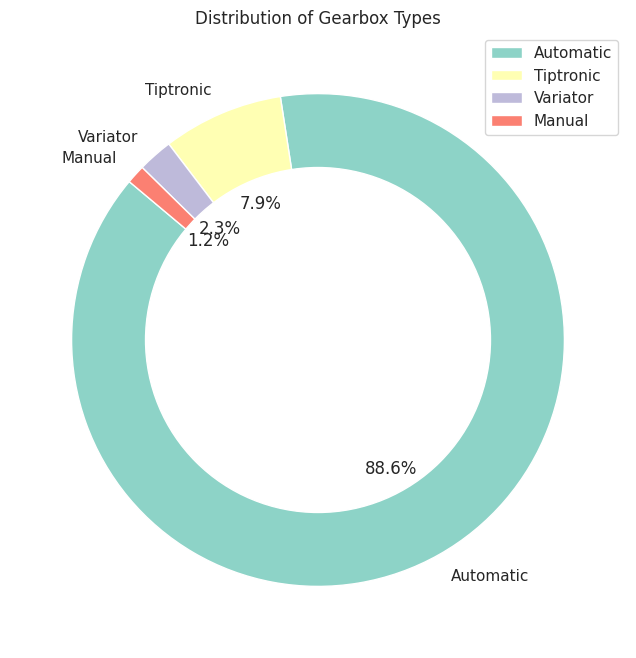

In [261]:
plt.figure(figsize=(8, 8))
plt.pie(gearbox_count, labels=gearbox_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Adding a circle at the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend()
plt.title('Distribution of Gearbox Types')
plt.show()


## 📌Getting avg of Prices by Year

In [262]:
average_prices = data.groupby('Prod. year')['Price'].mean().reset_index()
average_prices[:10]

,Prod. year,Price
0,1992,3136.000000
1,1993,9140.500000
2,1994,4077.000000
3,1995,12692.000000
4,1996,4464.888889
5,1997,5231.333333
6,1998,8114.625000
7,1999,11406.750000
8,2000,4900.000000
9,2001,4749.384615


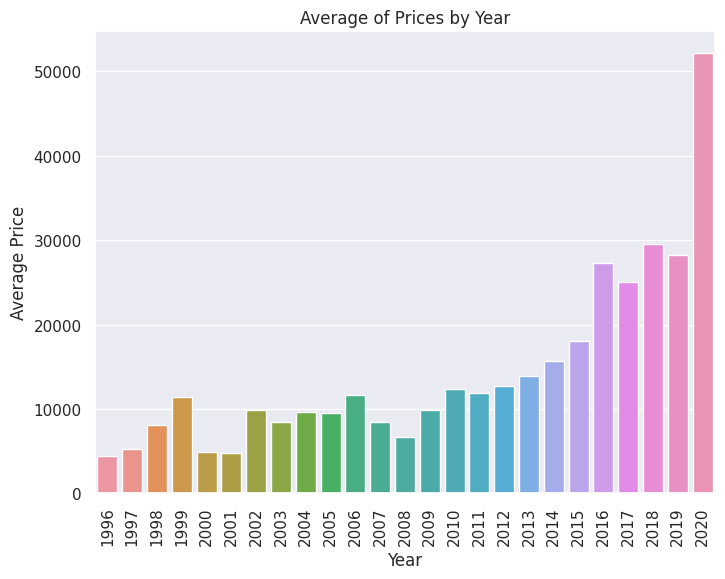

In [263]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.show()

## 📌Prices for Top 5 Manufacturer

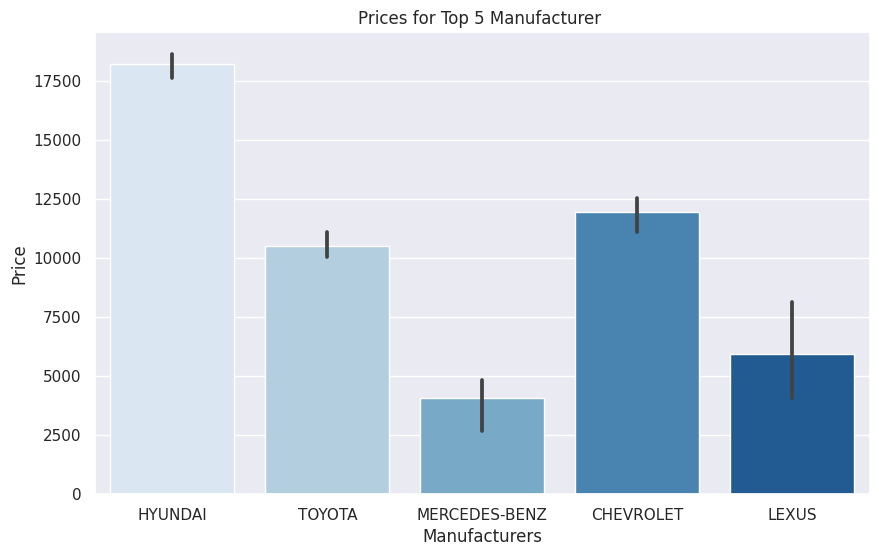

In [264]:
# Selecting 5 top manufacturers
top_manufacturers = data['Manufacturer'].value_counts().nlargest(5).index


# Create a bar plot with custom colors and sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=data[data['Manufacturer'].isin(top_manufacturers)],
            estimator='median', order=top_manufacturers, palette="Blues")
plt.title('Prices for Top 5 Manufacturer ') #median price
plt.xlabel('Manufacturers')
plt.ylabel('Price')
plt.show()


## 📌**Data Preprocessing for ML**

In [265]:
 data.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,1,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,9


In [266]:
# Drop Irrelevant Columns
data = data.drop(columns=['Prod. year'])

- **As a outlier detection algorithm, we will use ***IQR calculation*** and get rid of the values which is higher or lower than ***1.5 IQR***.**


📌 Handling Outliers for: Price
 - IQR Range: 3293.00 to 22894.00
 - Lower bound: -26108.50
 - Upper bound: 52295.50


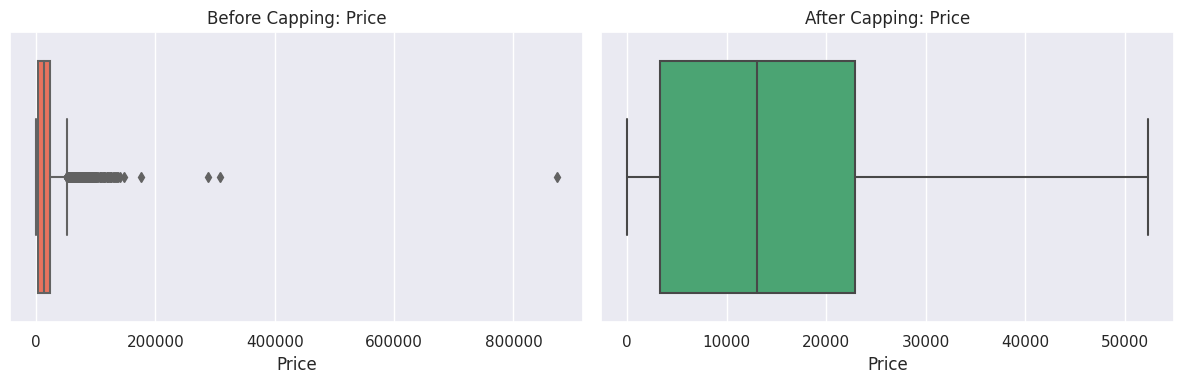


📌 Handling Outliers for: Mileage
 - IQR Range: 68782.00 to 181000.00
 - Lower bound: -99545.00
 - Upper bound: 349327.00


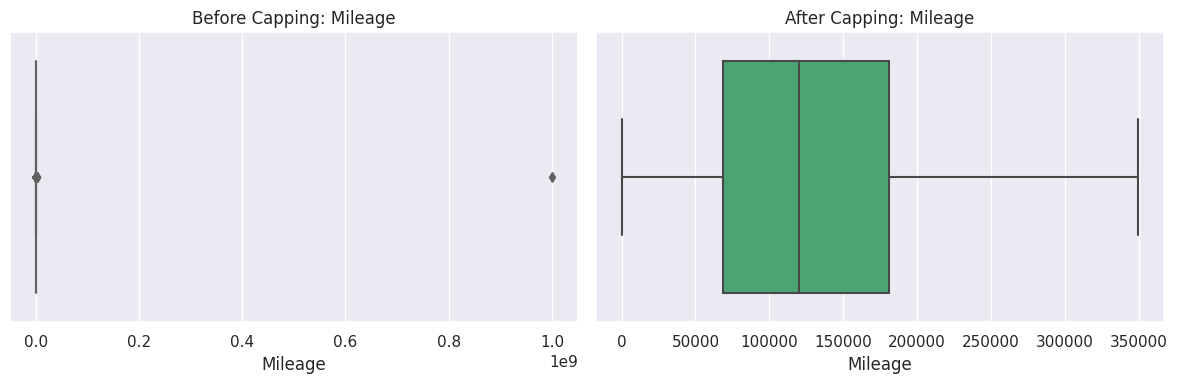


📌 Handling Outliers for: Levy
 - IQR Range: 640.00 to 1058.00
 - Lower bound: 13.00
 - Upper bound: 1685.00


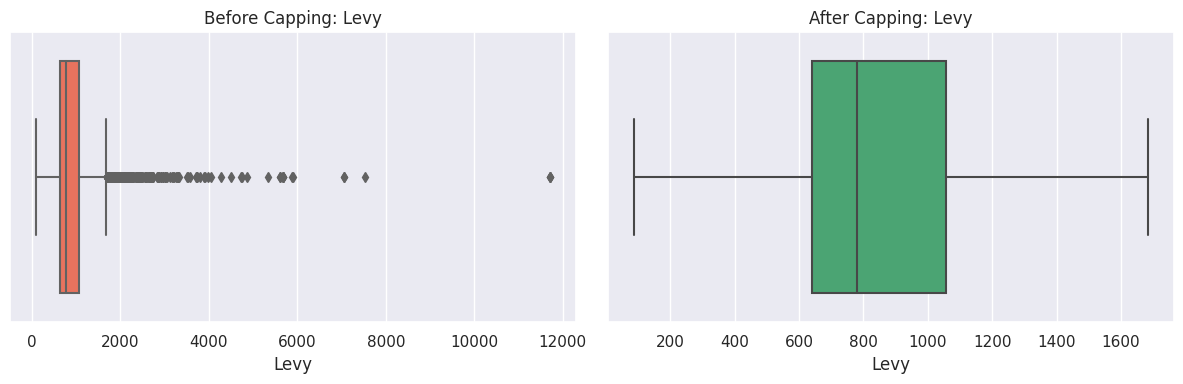

In [267]:
# ✅ Select numeric columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# ✅ Define function to cap outliers and plot
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n📌 Handling Outliers for: {column}")
    print(f" - IQR Range: {Q1:.2f} to {Q3:.2f}")
    print(f" - Lower bound: {lower_bound:.2f}")
    print(f" - Upper bound: {upper_bound:.2f}")

    # Visual before
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='tomato')
    plt.title(f"Before Capping: {column}")

    # Cap values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Visual after
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='mediumseagreen')
    plt.title(f"After Capping: {column}")
    plt.tight_layout()
    plt.show()

# ✅ Apply to all numeric columns except for columns you want to skip
columns_to_fix = ['Price', 'Mileage', 'Levy']

for col in columns_to_fix:
    if col in data.columns:
        cap_outliers_iqr(data, col)


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12460 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12460 non-null  float64
 1   Levy              12460 non-null  float64
 2   Manufacturer      12460 non-null  object 
 3   Model             12460 non-null  object 
 4   Category          12460 non-null  object 
 5   Leather interior  12460 non-null  int64  
 6   Fuel type         12460 non-null  object 
 7   Engine volume     12460 non-null  float64
 8   Mileage           12460 non-null  int64  
 9   Cylinders         12460 non-null  float64
 10  Gear box type     12460 non-null  object 
 11  Drive wheels      12460 non-null  object 
 12  Doors             12460 non-null  int64  
 13  Wheel             12460 non-null  object 
 14  Color             12460 non-null  object 
 15  Airbags           12460 non-null  int64  
 16  Age               12460 non-null  int64  
dty

# Transform Data

> **Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)**

In [269]:
# Label encode categorical features
le = LabelEncoder()
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [270]:
# Final clean dataset
data.dropna(inplace=True)
print("Cleaned Shape:", data.shape)

Cleaned Shape: (12460, 17)


## 📌Features Selection and Target

In [271]:
# Train/Test Split and Scaling
X = data.drop('Price', axis=1)
y = data['Price']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [274]:
# Confirm new data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12460 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12460 non-null  float64
 1   Levy              12460 non-null  float64
 2   Manufacturer      12460 non-null  int64  
 3   Model             12460 non-null  int64  
 4   Category          12460 non-null  int64  
 5   Leather interior  12460 non-null  int64  
 6   Fuel type         12460 non-null  int64  
 7   Engine volume     12460 non-null  float64
 8   Mileage           12460 non-null  int64  
 9   Cylinders         12460 non-null  float64
 10  Gear box type     12460 non-null  int64  
 11  Drive wheels      12460 non-null  int64  
 12  Doors             12460 non-null  int64  
 13  Wheel             12460 non-null  int64  
 14  Color             12460 non-null  int64  
 15  Airbags           12460 non-null  int64  
 16  Age               12460 non-null  int64  
dty

## **Build Model**

In [282]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Store results
results = []
trained_models = {}

In [283]:
# Train and evaluate each model
for name, model in models.items():
    if name in ['Linear Regression', 'SVR']:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse})
    trained_models[name] = model  # Store the trained model

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('R2 Score', ascending=False)
print(results_df)

               Model  R2 Score          RMSE
3      Random Forest  0.819355   6136.406143
2      Decision Tree  0.700411   7902.476633
4  Gradient Boosting  0.667153   8329.578219
0  Linear Regression  0.303684  12047.692821
1                SVR -0.021604  14592.912257


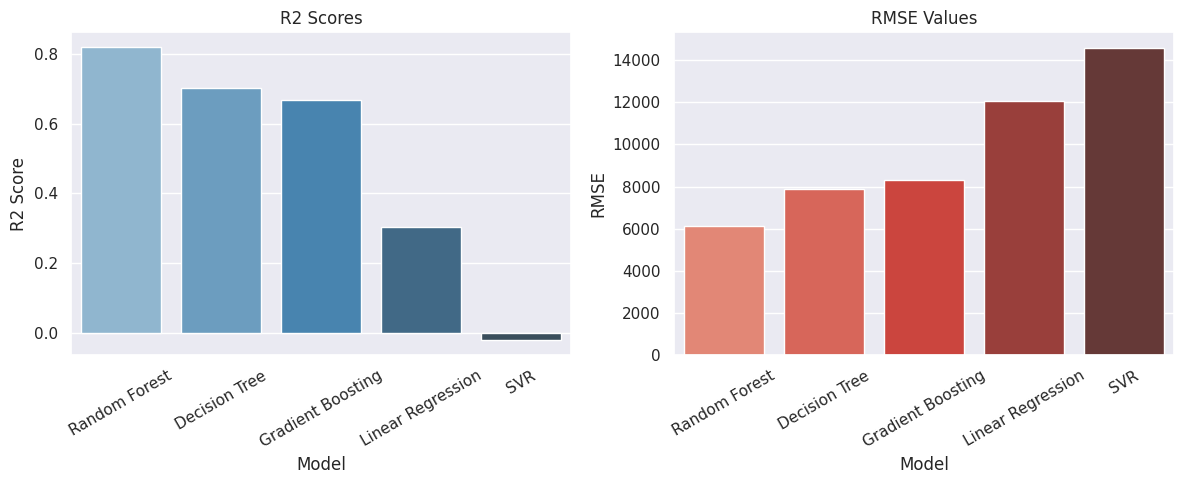

In [285]:
# Comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='Blues_d')
plt.xticks(rotation=30)
plt.title('R2 Scores')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='Reds_d')
plt.xticks(rotation=30)
plt.title('RMSE Values')

plt.tight_layout()
plt.show()

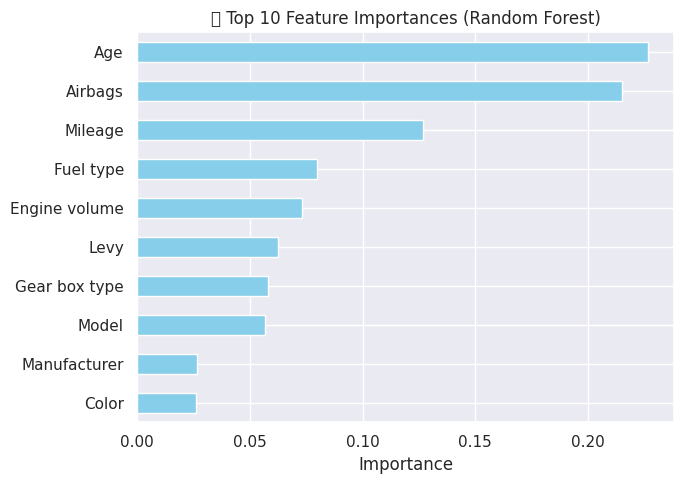

In [286]:
# Use best tree-based model (Random Forest in this case)
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

# Only show feature importances if the model supports it
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh', color='skyblue')
    plt.title(f"🔧 Top 10 Feature Importances ({best_model_name})")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## **Using Model to predict new data**

In [287]:
import pickle

# 💾 Save the best model to a file using pickle

file_name = 'Car_price_prediction.sav'
with open(file_name, 'wb') as f:
    pickle.dump(best_model, f)

In [288]:
loaded_model = pickle.load(open('Car_price_prediction.sav', 'rb'))

<p style="font-size:18px; line-height:1.7; color:#333;">
  This project delivers a complete machine learning workflow to solve a practical challenge:
  <strong>predicting car prices</strong> based on real-world vehicle attributes.
</p>

<h3 style="color:#2c3e50; margin-top:25px;">🔍 Key Achievements:</h3>
<ul style="font-size:17px; line-height:1.8; color:#333;">
  <li>✅ Cleaned and prepared a dataset with <strong>19,000+ rows</strong> and 18 features</li>
  <li>🧠 Engineered new features like <code>Car Age</code> to enrich model learning</li>
  <li>📊 Explored distributions, outliers, and feature relationships via rich EDA</li>
  <li>⚙️ Trained 5 regression models and selected <strong>Random Forest</strong> as the best</li>
  <li>📈 Achieved strong performance with R² ≈ 0.82</li>
  <li>📦 Exported the final model using <code>pickle</code> for deployment</li>
</ul>

<h3 style="color:#2c3e50; margin-top:25px;">💡 Insights:</h3>
<ul style="font-size:17px; line-height:1.8; color:#333;">
  <li>🚘 Car price is most influenced by: <strong>Production Year, Mileage, Engine Volume, Airbags, and Manufacturer</strong></li>
  <li>📉 Linear models struggled with outliers — tree-based models handled them better</li>
  <li>🧹 Proper handling of inconsistent data entries (e.g., <code>Levy</code>, <code>Doors</code>) is critical</li>
</ul>

<h3 style="color:#2c3e50; margin-top:25px;">🚀 What’s Next?</h3>
<ul style="font-size:17px; line-height:1.8; color:#333;">
  <li>🌐 Build a <strong>Streamlit web app</strong> for real-time car price prediction</li>
  <li>🛠️ Enhance models using <code>GridSearchCV</code>, <code>XGBoost</code>, or stacking</li>
  <li>🔍 Integrate model explanation tools like <strong>SHAP</strong> for interpretability</li>
</ul>

<p style="margin-top:30px; background:#e8f4fc; padding:15px; border-left:5px solid #1a75cf; border-radius:6px; font-size:17px;">
  🚗 <strong>Final Thought:</strong> This project demonstrates how data science can drive smarter pricing decisions in the automotive market, combining insight, prediction, and deployment.
</p>
